## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

'50_Startups.csv' is going to be a venture capitalist fund challenge.

The dataset has 5 columns for 50 companies. The data reflects an extract from their profit and loss statements in their income report.

R&d Spend: Money spent on research and development.
Adminstration Spend: Money spent on an administration like paying employees paying executives, etc.
Marketing Spend: Money spent on marketing.
State: State, the company operates in.
Profit: Profit of that company for that financial year.

A venture capitalist fund has hired you as a data scientist to analyze these 50 companies and create a model that will help them understand which types of companies to invest in. What they're looking for is this is a sample and they want to understand for instance whether companies perform better in New York or California all other things held equal. Will a company that spends more on marketing perform better or a company spends less on marketing? Do they look for companies that spend more on R&D spend or on research and development or companies that spend more on marketing?

Since the main criteria is profit, it becomes the 'dependent' variable. The other variables will become the 'independent' variables. So you have to create a model which will tell you about profit based on R&D, marketing, admin and state. Bear in mind that the venture capital fund is not looking to invest in these 50 companies per se.

Based on your model they will set up a set of guidelines for their own venture capitalist fund with a goal to maximize their profit

** Read in the '50_Startups.csv' file as a DataFrame called companies.**

In [3]:
train = pd.read_csv('50_Startups.csv')

**Check the head of companies, and check out its info() and describe() methods.**

In [4]:
train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [6]:
train.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Exploratory Data Analysis

**Let's explore the data!**

For the next few exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Profit and R&D Spend columns. Does the correlation make sense?**

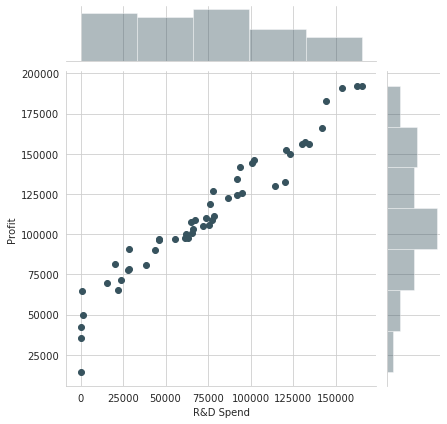

In [69]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(data=train,x='R&D Spend',y='Profit')

In [70]:
#there is a strong correlation between the R&D spend and Profit

** Use jointplot to create a 2D hex bin plot comparing the Profit and R&D Spend columns.**

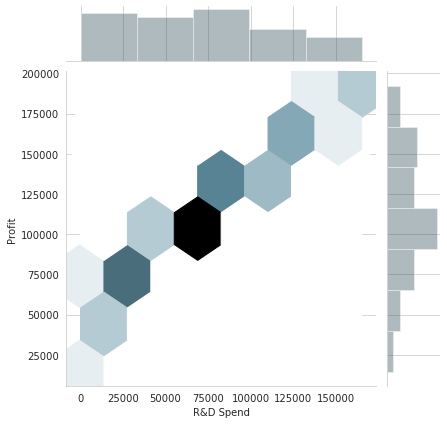

In [71]:
sns.jointplot(data = train, x = "R&D Spend", y = "Profit", kind = "hex")

**Use seaborn to create a jointplot to compare the Profit and Marketing Spend columns. Does the correlation make sense?**

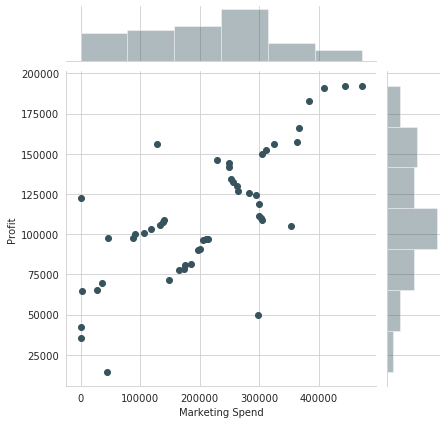

In [75]:
sns.jointplot(data = train, x = "Marketing Spend", y = "Profit")

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

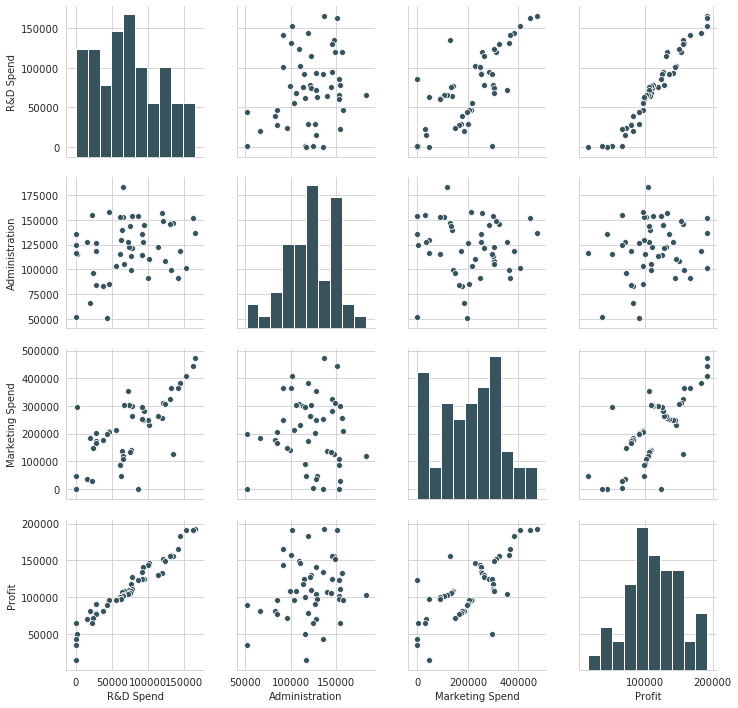

In [12]:
sns.pairplot(train)

**Based off this plot what looks to be the most correlated feature with Profit?**

In [74]:
#R & D Spend is the most correlated feature with profit

**Create a linear model plot (using seaborn's lmplot) of  R&D Spend vs. Profit. **

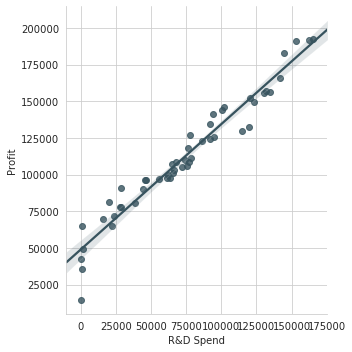

In [76]:
sns.lmplot(data = train,x = "R&D Spend", y = "Profit")

In [77]:
#there is a strong correlation

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the companies and a variable y equal to the "Profit" column. **

In [29]:
X = train[["R&D Spend", "Administration", "Marketing Spend"]]

In [81]:
y = train["Profit"]
train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [21]:
from sklearn.model_selection import train_test_split

In [33]:
X = train[["R&D Spend", "Administration", "Marketing Spend"]]
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.33, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [40]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [41]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [42]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [82]:
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [0.79745928 0.0170216  0.03637315]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [83]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted values')

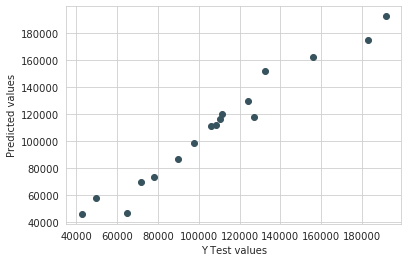

In [84]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test values')
plt.ylabel('Predicted values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [86]:
from sklearn import metrics


print ('MAE:',metrics.mean_absolute_error(y_test,predictions))
print ('MSE:',metrics.mean_squared_error(y_test,predictions))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


metrics.explained_variance_score(y_test,predictions)

MAE: 6578.663278826674
MSE: 68640209.55196631
RMSE: 8284.938717453879


0.9601938200174633

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

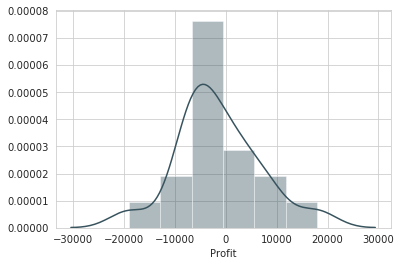

In [87]:
sns.distplot(y_test - predictions)

## Conclusion
What feature should we spend on the most?

** Recreate the dataframe below. **

In [88]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecient'])
cdf

,Coeffecient
R&D Spend,0.797459
Administration,0.017022
Marketing Spend,0.036373


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

## Including the State in the analysis

In [91]:
state = pd.get_dummies(train['State'], drop_first = True)

In [92]:
state

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [101]:
train = pd.concat([train, state], axis = 1)

In [113]:
train.head(1)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York,Florida,New York
0,165349.2,136897.8,471784.1,192261.83,0,1,0,1


In [155]:
# Inspect the head of the updated dataframe

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [100]:
y = train['Profit']
train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida',
       'New York'],
      dtype='object')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [108]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
predictions = lm.predict(X_test)

In [110]:
from sklearn import metrics


print ('MAE:',metrics.mean_absolute_error(y_test,predictions))
print ('MSE:',metrics.mean_squared_error(y_test,predictions))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


metrics.explained_variance_score(y_test,predictions)

MAE: 6612.365791789353
MSE: 77165033.02002066
RMSE: 8784.362983166206


0.93683204382671

In [111]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coeff']
coefficients

,Coeff
R&D Spend,35910.068475
Administration,-540.277644
Marketing Spend,5539.719300


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.